CG MSM from Qhel directly via rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Read in the dtrajs
------

In [4]:
indir = '/data/isilon/rudzinski/cluster_tmp/AAQAA/AAQAA_hybrid_AMBER_Go/wDB-HP_inter/NC_CA/2016_10_21/epsNC-11/epsNC-11_epsdb-0.3epsNC_epshp-0.25epsNC/T-240/MSM_analysis/'

dtraj_rama = np.load(indir+'BMSM/dtraj/traj_rama.npy')


In [5]:
Nrama = dtraj_rama.shape[0]
Ntraj = dtraj_rama.shape[1]
Nfr = dtraj_rama.shape[2]
Ndih = dtraj_rama.shape[3]

In [7]:
dtraj_rama.shape

(15, 40, 200001, 2)

In [8]:
for rama in range(Nrama):
    for i in range( Ntraj ):
        dtraj_rama[rama][i][np.where(dtraj_rama[rama][i][:,1] < -125)[0],1] += 360  

In [9]:
dtraj_phi = []
for rama in range(Nrama):
    dtraj_phi.append([])
    for i in range( len(dtraj_rama[rama]) ):
        dtraj_phi[rama].append(dtraj_rama[rama][i][:,1])

**simple clustering along psi only for discretization**

In [10]:
n_clusters = 2     # number of k-means clusters

In [11]:
clustering_rama = []
for rama in range(Nrama):
    clustering_rama.append(coor.cluster_kmeans(dtraj_phi[rama],k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True))

31-05-17 14:59:32 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] INFO     Cluster centers converged after 5 steps.
31-05-17 14:59:35 pyemma.coordinates.clustering.kmeans.KmeansClustering[1] INFO     Cluster centers converged after 6 steps.
31-05-17 14:59:38 pyemma.coordinates.clustering.kmeans.KmeansClustering[2] INFO     Cluster centers converged after 6 steps.
31-05-17 14:59:39 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 4 steps.
31-05-17 14:59:43 pyemma.coordinates.clustering.kmeans.KmeansClustering[4] INFO     Cluster centers converged after 6 steps.
31-05-17 14:59:44 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Cluster centers converged after 5 steps.
31-05-17 14:59:47 pyemma.coordinates.clustering.kmeans.KmeansClustering[6] INFO     Cluster centers converged after 5 steps.
31-05-17 14:59:49 pyemma.coordinates.clustering.kmeans.KmeansClustering[7] INFO     Cluster centers converged after 5 steps.


[   6.78592205  148.73504639]
[   1.62918806  148.98022461]
[  -2.22726536  142.13717651]
[  9.99142826e-02   1.49376694e+02]
[   0.78130341  147.42440796]
[   1.43647611  144.85653687]
[  -4.3333025   149.88964844]
[  -4.06373167  143.54232788]
[  -0.23706897  150.68148804]
[  -0.1831878   148.04045105]
[   1.71827412  146.01660156]
[ 150.03274536   -4.27072191]
[ 141.74578857    0.20390335]
[ 146.55865479    8.82925415]
[  1.48341400e+02   1.19800411e-01]


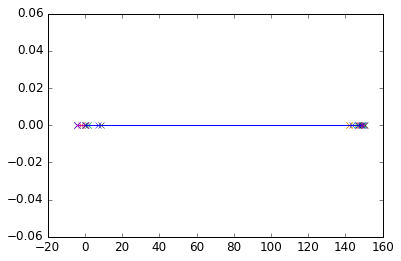

In [12]:
cc_rama = []
for rama in range(Nrama):
    cc_rama.append(clustering_rama[rama].clustercenters[:,0])
    plt.plot(cc_rama[rama],np.zeros(len(cc_rama[rama])),marker='x')
    print cc_rama[rama]

In [13]:
dtrajs_rama = []
for rama in range(Nrama):
    dtrajs_rama.append(clustering_rama[rama].dtrajs)

In [14]:
for rama in range(Nrama):
    for traj in range( len(dtraj_rama[rama]) ):
        if ( dtrajs_rama[rama][traj][np.where(dtraj_phi[rama][traj] < 0)[0][0]] != 0 ):
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == 0)[0]] -= 1
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == 1)[0]] -= 1
            dtrajs_rama[rama][traj][np.where(dtrajs_rama[rama][traj] == -1)[0]] += 2

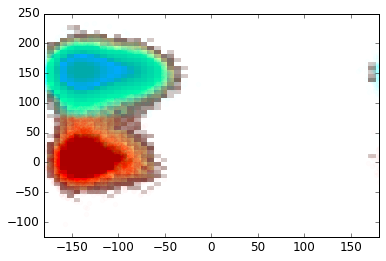

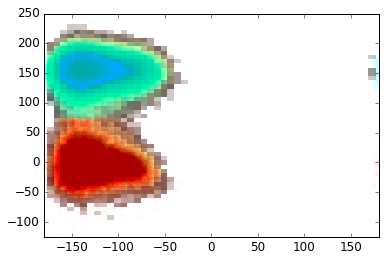

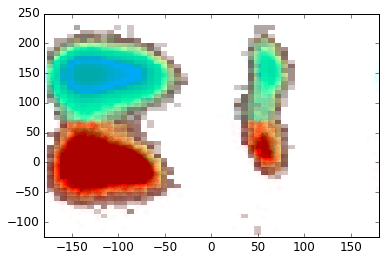

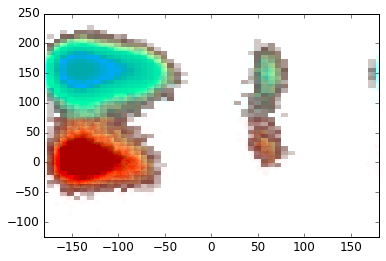

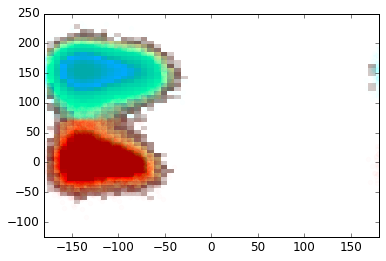

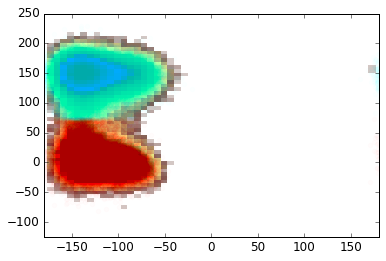

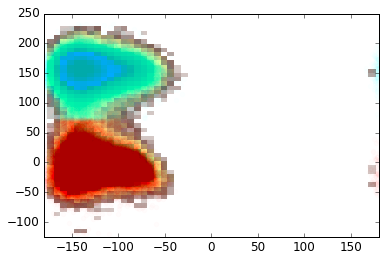

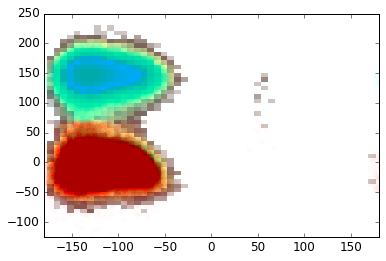

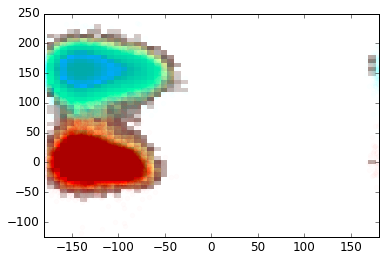

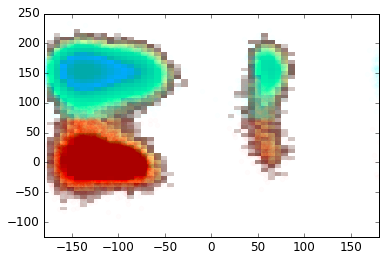

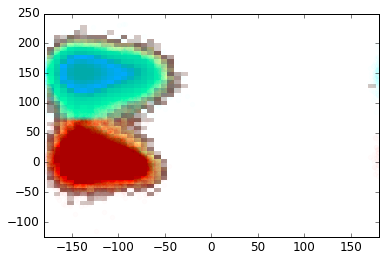

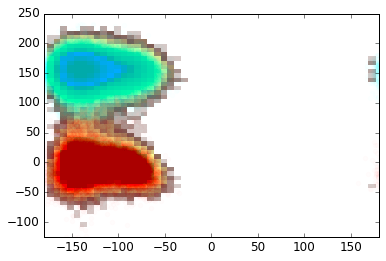

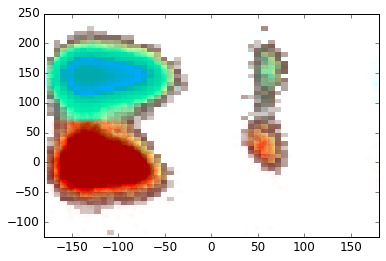

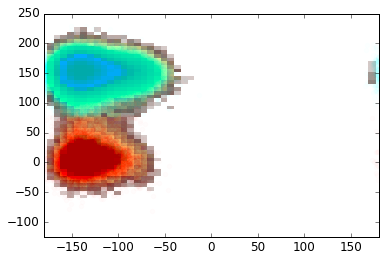

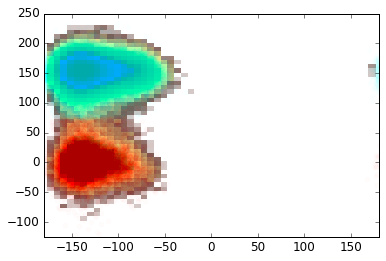

In [15]:
for rama in range(Nrama):
    H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama[rama][0][:,0], dtraj_rama[rama][0][:,1], bins=50, range=None, normed=None, weights=None )
    phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
    psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

    H_rama = np.rot90(H_rama)
    H_rama = np.flipud(H_rama)
    FE_H = -np.ma.log(H_rama)
    FE_H -= np.min(FE_H)
    FE_max = np.max(FE_H)
    FE_H = FE_H.filled()
    plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),1],color='red',alpha=0.01)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),1],color='cyan',alpha=0.01)
    plt.xlim([-180,180])
    plt.ylim([-125,250])
    plt.show()

In [16]:
dtraj_psi = []
for rama in range(Nrama):
    dtraj_psi.append([])
    for i in range( len(dtraj_rama[rama]) ):
        dtraj_psi[rama].append(dtraj_rama[rama][i][:,0])

In [20]:
# remove the LH-helix states from the helix
for rama in range(Nrama):
    for traj in range( Ntraj ):
        LH_frs = np.where( dtraj_psi[rama][traj] > 0 )[0]
        dtrajs_rama[rama][traj][LH_frs] = 1

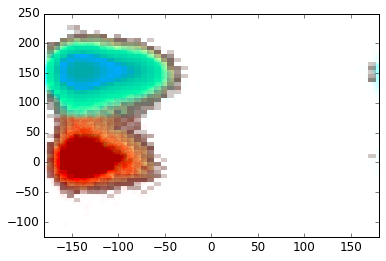

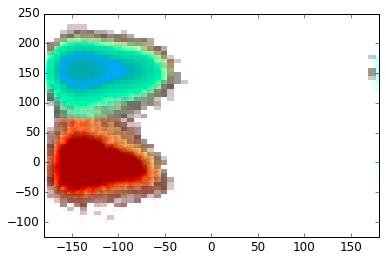

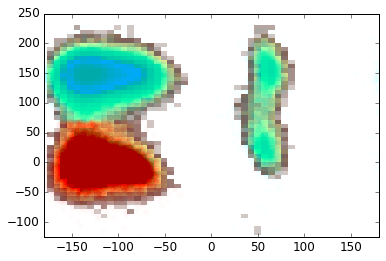

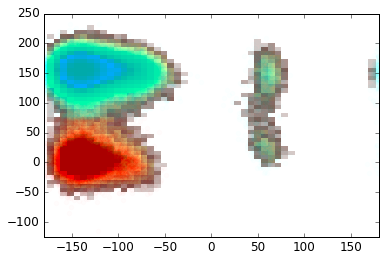

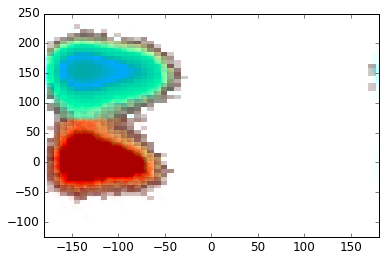

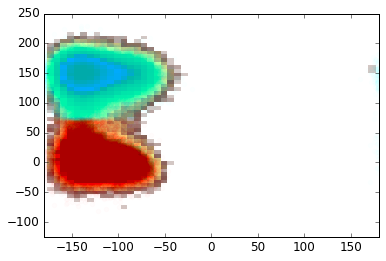

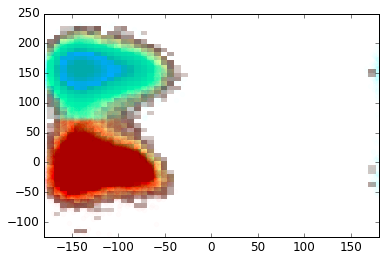

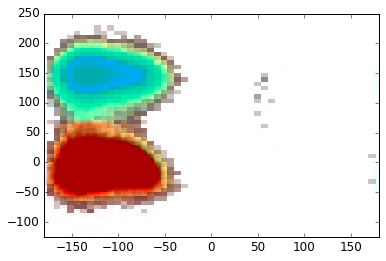

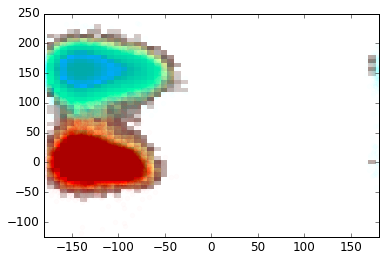

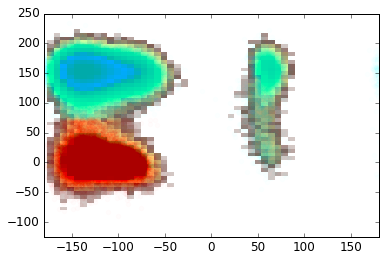

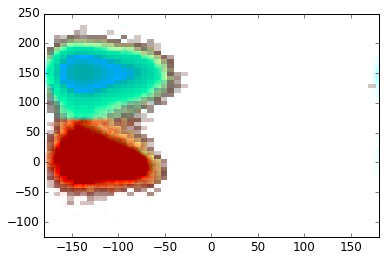

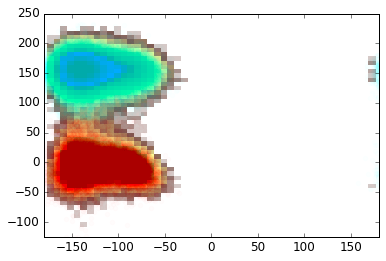

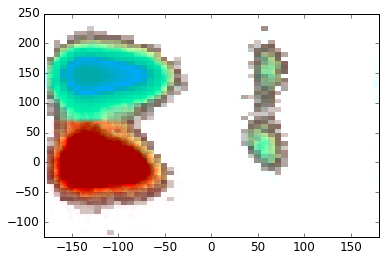

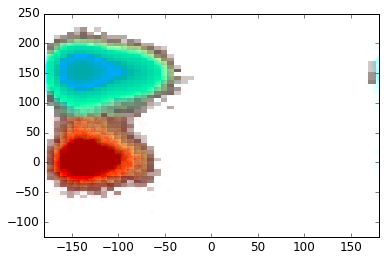

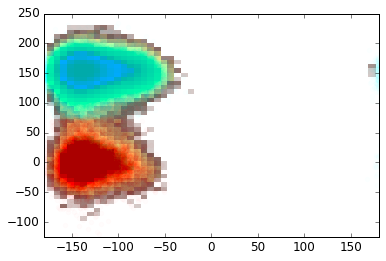

In [21]:
for rama in range(Nrama):
    H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama[rama][0][:,0], dtraj_rama[rama][0][:,1], bins=50, range=None, normed=None, weights=None )
    phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
    psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

    H_rama = np.rot90(H_rama)
    H_rama = np.flipud(H_rama)
    FE_H = -np.ma.log(H_rama)
    FE_H -= np.min(FE_H)
    FE_max = np.max(FE_H)
    FE_H = FE_H.filled()
    plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==0),1],color='red',alpha=0.01)
    plt.scatter(dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),0],dtraj_rama[rama][0][np.where(dtrajs_rama[rama][0]==1),1],color='cyan',alpha=0.01)
    plt.xlim([-180,180])
    plt.ylim([-125,250])
    plt.show()

In [22]:
dtrajs = []
for traj in range( len(dtrajs_rama[0]) ):
    tmp = dtrajs_rama[0][traj]
    for rama in range(1,len(dtrajs_rama)):
        tmp = np.vstack( (tmp,dtrajs_rama[rama][traj]) )
    tmp = tmp.T
    dtrajs.append( tmp )
    dtrajs[traj].astype('int64')

In [23]:
dtrajs[0].shape

(200001, 15)

In [24]:
dtrajs_sum = []
for i in range( len(dtrajs) ):
    dtrajs_sum.append( np.sum(dtrajs[i],axis=1) )
    dtrajs_sum[i].astype('int64')

In [25]:
# we need a single dimensional identifier of the microstate, can we cluster to automize?
# n_clusters = 2**15
# clustering = coor.cluster_regspace(dtrajs,max_centers=n_clusters,dmin=0.5)
#clustering = coor.cluster_kmeans(dtrajs,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)

# this is unnecessary and expensive for so many states, we already generated the states, just read them in
cc = np.load('/data/isilon/rudzinski/cluster_tmp/AAQAA/AAQAA_hybrid_AMBER_Go/wDB-HP_inter/NC_CA/2016_10_21/cc_full.npy')

In [26]:
#dtrajs_full_1D = clustering.dtrajs

In [27]:
# cc = clustering.clustercenters[:]
cc.shape

(32768, 15)

In [28]:
# convert the full traj to 1D
dtrajs_full_1D = []
for traj in range(len(dtrajs)):
    dtrajs_full_1D.append([])
    for fr in range(dtrajs[traj].shape[0]):
        state = np.where( np.all(dtrajs[traj][fr]==np.array(cc),axis=1) == True )[0][0]
        dtrajs_full_1D[traj].append(state)
    dtrajs_full_1D[traj] = np.array(dtrajs_full_1D[traj])

KeyboardInterrupt: 

In [ ]:
np.save('dtrajs_rama_2st_allres_1D_noLHhelix', dtrajs_full_1D)
#
np.save('dtrajs_Qhel_allres_1D_noLHhelix', dtrajs_1D)